## Exploring the data

sentiment
neutral     5079
positive    3219
negative    2378
Name: count, dtype: int64
sentiment
neutral     5364
positive    3652
negative    1660
Name: count, dtype: int64
sentiment
neutral     2597
positive    1850
negative    1077
Name: count, dtype: int64


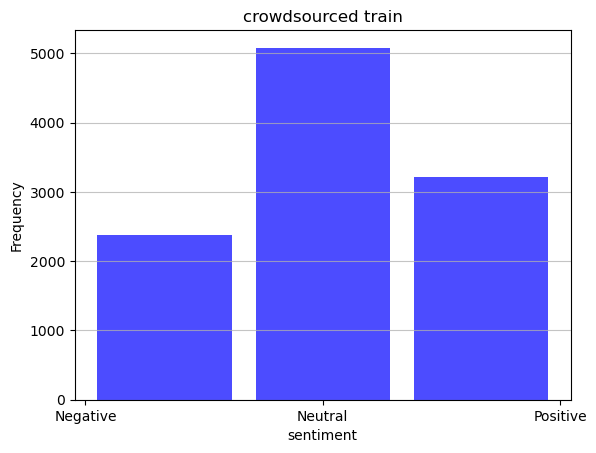

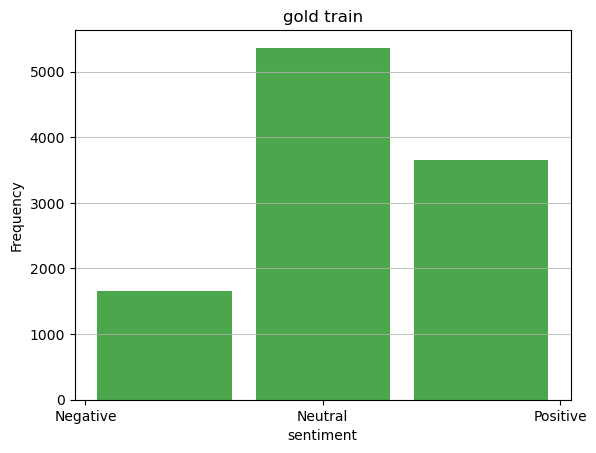

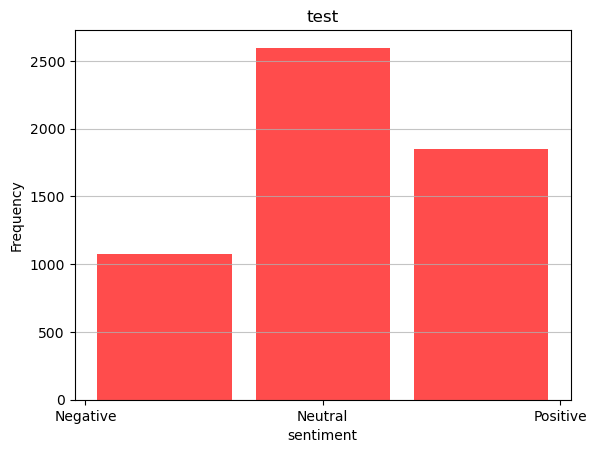

In [18]:
import pandas as pd

## convert tab separated files to csv

df1 = pd.read_csv('crowdsourced_train.csv', sep='\t')
df2 = pd.read_csv('gold_train.csv', sep='\t')
df3 = pd.read_csv('test.csv', sep='\t')




# 
df1_y = df1['sentiment']
for i in range(len(df1_y)):
    if "u" in df1_y[i]:
        df1_y[i] = "neutral"
    elif "g" in df1_y[i] or "Nedative" in df1_y[i]:
        df1_y[i] = "negative"
    elif "p" in df1_y[i] or "o" in df1_y[i] or "P" in df1_y[i]:
        df1_y[i] = "positive"
    


print(df1_y.value_counts())
df2_y = df2['sentiment']
print(df2_y.value_counts())
df3_y = df3['sentiment']
print(df3_y.value_counts())


import matplotlib.pyplot as plt

label_order = ['Negative', 'Neutral', 'Positive']
label_map = {'neutral': 1, 'negative': 0, 'positive': 2}
map_1 = df1_y.map(label_map)
map_2 = df2_y.map(label_map)
map_3 = df3_y.map(label_map)

plt.hist(map_1, bins=3, color='blue', alpha=0.7, rwidth=0.85)
plt.title('crowdsourced train')
plt.xlabel('sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y', alpha=0.75)
plt.show()



plt.hist(map_2, bins=3, color='green', alpha=0.7, rwidth=0.85)
plt.title('gold train')
plt.xlabel('sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y', alpha=0.75)
plt.show()



plt.hist(map_3, bins=3, color='red', alpha=0.7, rwidth=0.85)
plt.title('test')
plt.xlabel('sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
## Agreement Score between crowdsourced_train and gold_train
n_agree = 0

for i in range(df1_y.size):
    if df1_y[i] == df2_y[i]:
        n_agree += 1
        

p0 = n_agree/df1_y.size

print(p0)

0.6549269389284376


[[2292, 864, 63], [1174, 3504, 401], [186, 996, 1196]]


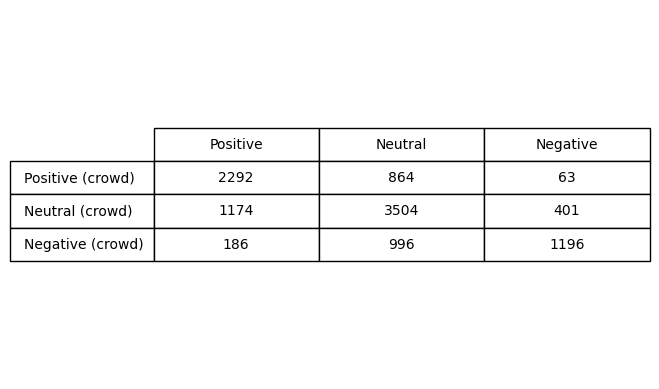

In [10]:
n_pos_pos = 0
n_neg_pos = 0
n_neu_pos = 0

n_pos_neu = 0
n_neg_neu = 0
n_neu_neu = 0

n_pos_neg = 0
n_neg_neg = 0
n_neu_neg = 0
for i in range(df1_y.size):
    if df1_y[i] == 'positive' and df2_y[i] == 'positive':
        n_pos_pos += 1
    if df1_y[i] == 'negative' and df2_y[i] == 'positive':
        n_neg_pos += 1
    if df1_y[i] == 'neutral' and df2_y[i] == 'positive':
        n_neu_pos += 1

    if df1_y[i] == 'positive' and df2_y[i] == 'neutral':
        n_pos_neu += 1
    if df1_y[i] == 'negative' and df2_y[i] == 'neutral':
        n_neg_neu += 1
    if df1_y[i] == 'neutral' and df2_y[i] == 'neutral':
        n_neu_neu += 1

    if df1_y[i] == 'positive' and df2_y[i] == 'negative':
        n_pos_neg += 1
    if df1_y[i] == 'negative' and df2_y[i] == 'negative':
        n_neg_neg += 1
    if df1_y[i] == 'neutral' and df2_y[i] == 'negative':
        n_neu_neg += 1

# Sample 3x3 data (e.g., multiplication table)
data = [ [n_pos_pos,n_pos_neu,n_pos_neg], [n_neu_pos,n_neu_neu,n_neu_neg],[n_neg_pos,n_neg_neu,n_neg_neg] ]

print(data)

row_labels = ['Positive (crowd)', 'Neutral (crowd)', 'Negative (crowd)']
col_labels = ['Positive', 'Neutral', 'Negative']
# Create figure and axis
fig, ax = plt.subplots()
ax.axis('off')  # Hide the axes

# Create table
table = ax.table(cellText=data, loc='center', cellLoc='center', rowLabels=row_labels, colLabels=col_labels)

# Adjust table appearance
table.scale(1, 2)  # Optional: scale the table for better visibility

# Show the table
plt.show()
